In [2]:
import pandas as pd
from pandas import Series, DataFrame
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#add data
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


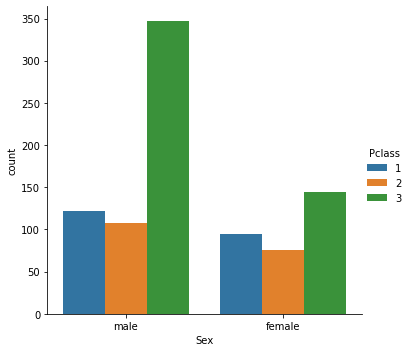

In [5]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


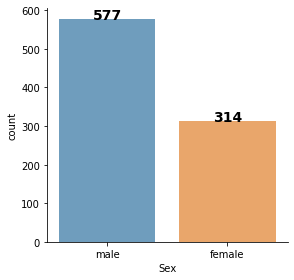

In [6]:
#display the quantities of gender

m=sns.factorplot('Sex', data=titanic_df, kind='count', alpha=0.7, size=4, aspect=1)

# m.ax gives the axis object
# m.ax.patches gives list of bars that can be access using index starting at 0

for i, bar in enumerate(m.ax.patches):
    h = bar.get_height()
    m.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)

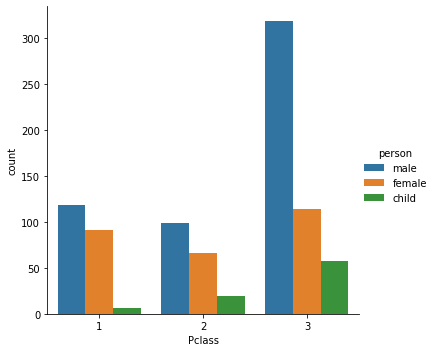

In [13]:
#display the quantities of adults and children
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df[0:10]

sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')



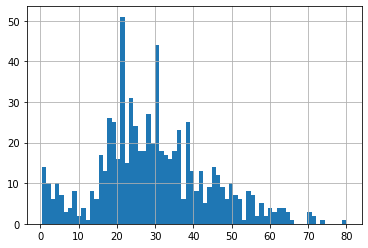

In [8]:
titanic_df['Age'].hist(bins=70)

In [9]:
titanic_df['Age'].mean() 

#looks like the mean age was about 30

29.69911764705882

In [23]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

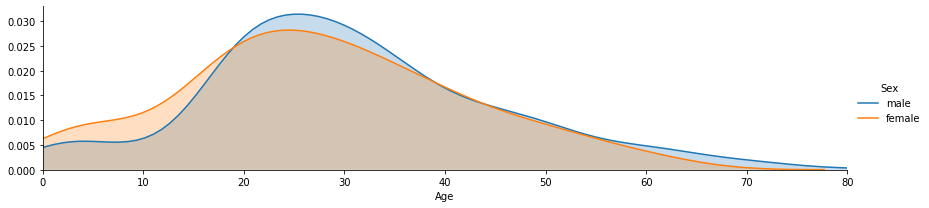

In [30]:
figure = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

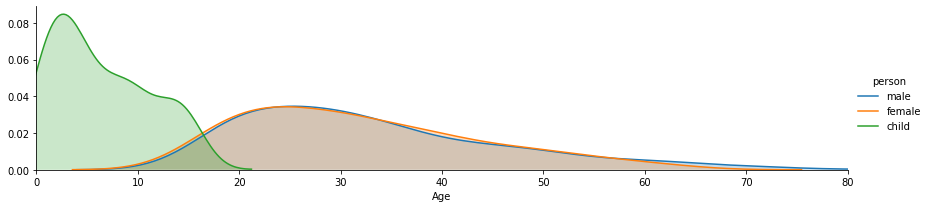

In [34]:
figure = sns.FacetGrid(titanic_df,hue='person',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

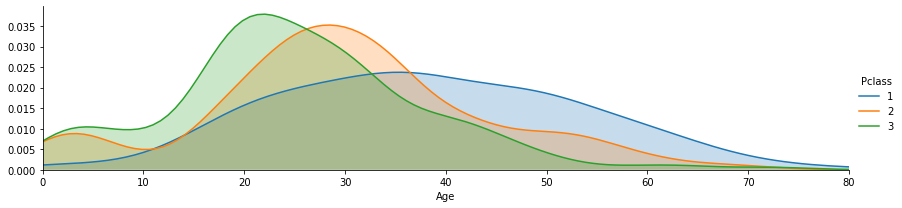

In [35]:
figure = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [37]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

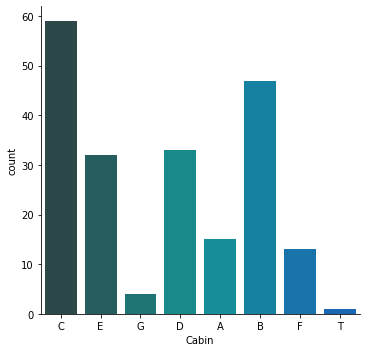

In [39]:
levels =[]

for level in deck:
    
    levels.append(level[0])
    
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

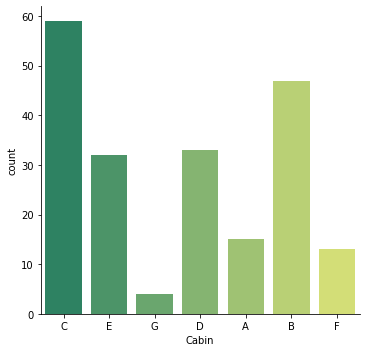

In [43]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


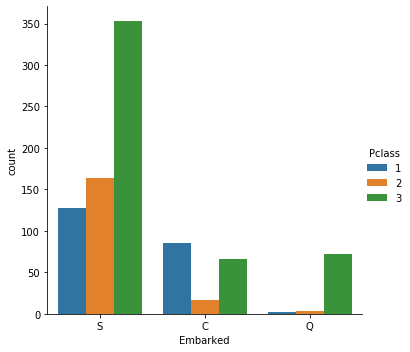

In [81]:
#display where people come from 

sns.factorplot('Embarked',data=titanic_df,hue='Pclass', row_order=['C','Q','S'],kind='count')

In [104]:
titanic_df['Alone or with family']= titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone or with family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone or with family, Length: 891, dtype: int64

In [105]:
titanic_df['Alone or with family'].loc[titanic_df['Alone or with family'] > 0] ='with family'
titanic_df['Alone or with family'].loc[titanic_df['Alone or with family'] == 0] ='Alone'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [106]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Alone or with family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Alone


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


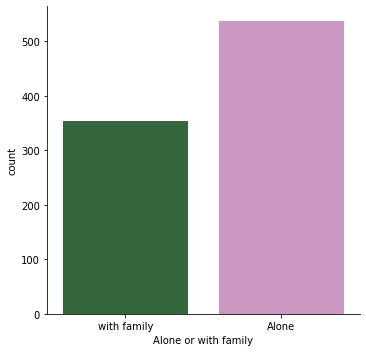

In [107]:
sns.factorplot('Alone or with family',data=titanic_df, kind ='count', palette='cubehelix')

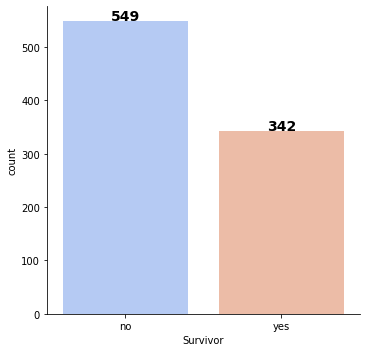

In [108]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
a=sns.factorplot('Survivor',data=titanic_df, kind ='count', palette='coolwarm')

for i, bar in enumerate(a.ax.patches):
    h = bar.get_height()
    a.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)

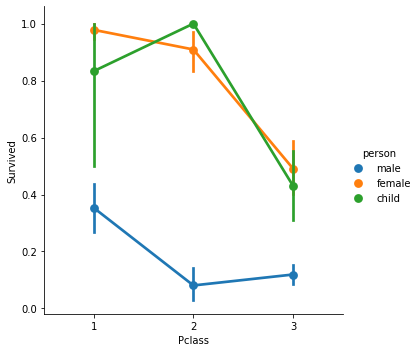

In [109]:
#display relationship between Pclass and gender

sns.factorplot('Pclass','Survived',data = titanic_df, hue='person')


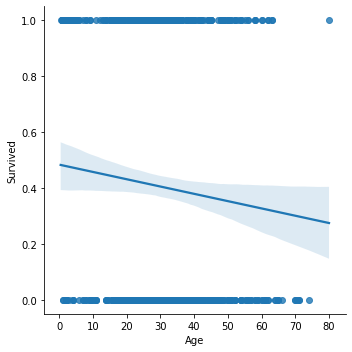

In [110]:
sns.lmplot('Age','Survived', data=titanic_df)
#look at the linear line: the older passenger is, the less likely they survive 

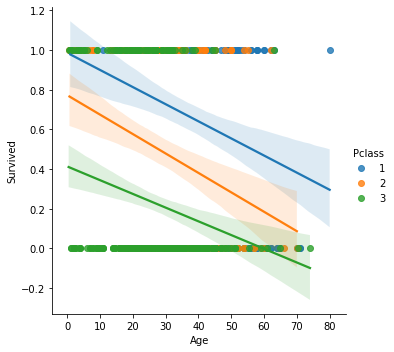

In [111]:
sns.lmplot('Age','Survived', data=titanic_df, hue='Pclass')

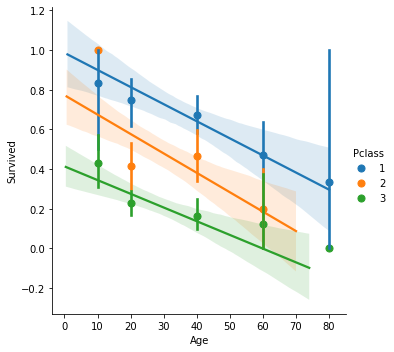

In [112]:

generation =[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass', data = titanic_df, x_bins =generation)

#people in Class 1 had more chance to survive than others

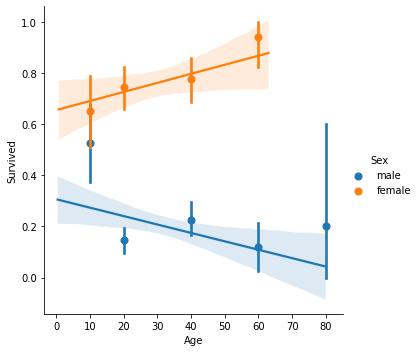

In [113]:
sns.lmplot('Age','Survived',hue='Sex', data = titanic_df, x_bins =generation)

# older women had better chances of surviving than older men. But for very old males there is significant standard deviation